In [1]:
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#Importing the Dataset
#Cals list of top 30 countries with X variables
thirty = pd.read_csv('C:\\Users\\D648007\\CalAllCountries.csv', encoding= 'unicode_escape')
dataset = thirty

In [3]:
#Look at dataset's dimensions: rows and columns
print(dataset.shape)

(141, 6)


In [4]:
dataset.dtypes

Country       object
Happiness    float64
GDP pc         int64
Freedom        int64
Democracy    float64
Ladder       float64
dtype: object

In [5]:
#View first 15 rows to see what the data is like
#Country - 
#Happiness - 
#GDP pc - 
#Freedom -
#Democracy - 
#Ladder - Happiness score OUTCOME VARIABLE 
dataset.head(15)


,Country,Happiness,GDP pc,Freedom,Democracy,Ladder
0,Afghanistan,2.523,2390,27,2.85,2.38
1,Albania,5.117,14218,66,6.08,5.00
2,Algeria,4.887,11112,32,3.77,4.75
3,Argentina,5.929,20751,84,6.95,5.79
4,Armenia,5.283,13261,55,5.35,5.49
5,Australia,7.183,51680,97,8.96,7.14
6,Austria,7.268,55218,93,8.16,7.21
7,Azerbaijan,5.171,14431,10,2.68,5.17
8,Bahrain,6.647,48766,12,2.49,6.17
9,Bangladesh,5.025,5307,39,5.99,4.50


In [6]:
#Confirm name of column with the country names in it as we want to remove it
dataset.columns

Index(['Country', 'Happiness', 'GDP pc', 'Freedom', 'Democracy', 'Ladder'], dtype='object')

In [7]:
#Drop the column with the country names
dataset = dataset.drop(['Country'], axis=1)
#Check that the column has been dropped 
dataset.head(5)

,Happiness,GDP pc,Freedom,Democracy,Ladder
0,2.523,2390,27,2.85,2.38
1,5.117,14218,66,6.08,5.00
2,4.887,11112,32,3.77,4.75
3,5.929,20751,84,6.95,5.79
4,5.283,13261,55,5.35,5.49


In [8]:
#Change column names to shorten them so are easier to read in tables
dataset.columns = ['Hap1', 'GDP', 'Free', 'Dem', 'Hap']

In [9]:
#Identify which columns have NaN (Not a Number - i.e. missing values)
nan_values = dataset.isna()
nan_columns = nan_values.any()

columns_with_nan = dataset.columns[nan_columns].tolist()
print(columns_with_nan)

#Need to remove the NaN

['Hap']


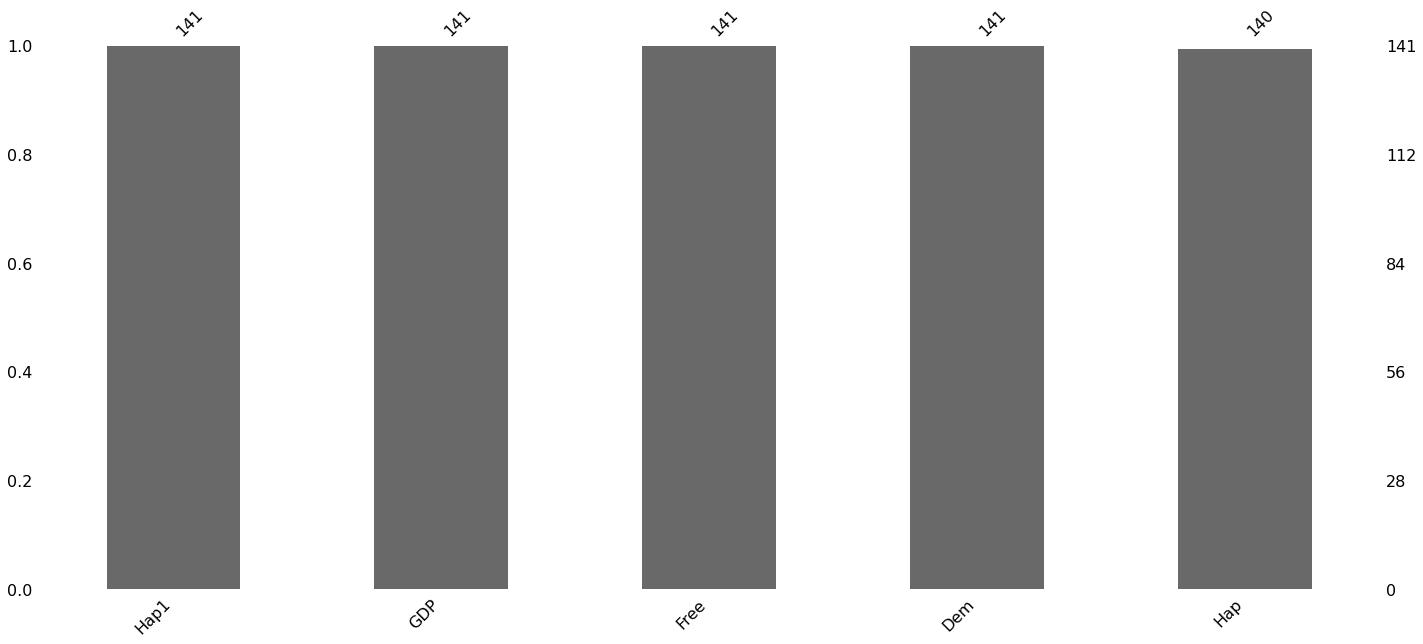

In [10]:
#Chart the features to see what % of each feature is missing, using the NaN
import missingno as msno
msno.bar(dataset)

In [11]:
#As the Nan is an Outcome variable (Hap, that we are modelling to understand), we may need to 
#remove the country from the dataset
#Find out which row it is
is_NaN = dataset.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = dataset[row_has_NaN]

print(rows_with_NaN)

     Hap1    GDP  Free   Dem  Hap
94  5.101  16712    66  5.89  NaN


In [12]:
#Remove row 94 as it has no outcome metric

dataset = dataset.drop(labels=94, axis=0)


In [13]:
#Check that with row 94 removed, there are no columns with NaN
nan_values = dataset.isna()
nan_columns = nan_values.any()

columns_with_nan = dataset.columns[nan_columns].tolist()
print(columns_with_nan)

#Need to remove the NaN

[]


In [14]:
#Get basic descriptive stats of the dataset to understand mean, median, standard dev, range
dataset.describe()

,Hap1,GDP,Free,Dem,Hap
count,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.528407,21561.614286,57.200000,5.572357,5.502643
std,1.082068,20324.748977,29.200917,2.187240,1.092755
min,2.523000,760.000000,2.000000,1.550000,2.380000
25%,4.847500,5350.500000,32.000000,3.615000,4.747500
50%,5.539500,13185.500000,60.000000,5.795000,5.490000
75%,6.231000,33283.250000,84.000000,7.202500,6.242500
max,7.842000,97057.000000,100.000000,9.810000,7.860000


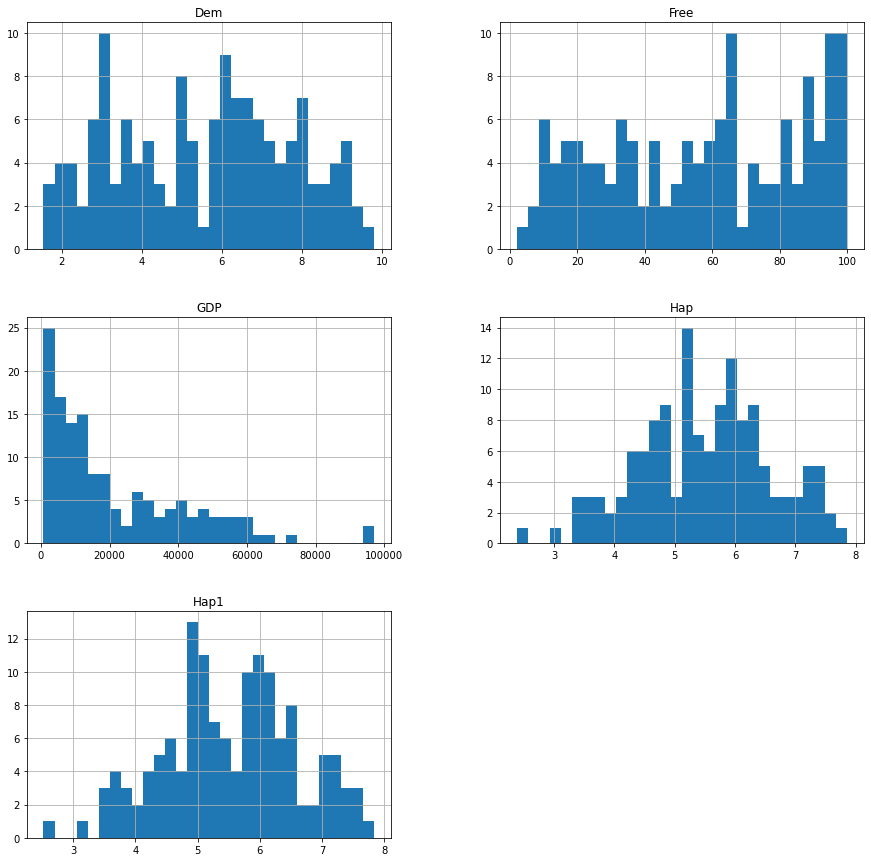

In [17]:
#Univariate histograms show us the distribution of each feature
dataset.hist(bins=30, figsize=(15, 15))
plt.show()

In [18]:
#To inspect the correlation between different features, i.e. how they may or may not change with each other. 
#Values range from -1 to 1 and a value of 0 means no correlation at all.
#Pearson's correlation assumes a normal distribution of the features.
#Some ML algorithms don't work well if the data is highly correlated.
from pandas import set_option
set_option('display.width', 150)
set_option('precision', 2)
corr = dataset.corr(method='pearson')
print(corr)

      Hap1   GDP  Free   Dem   Hap
Hap1  1.00  0.76  0.58  0.63  0.98
GDP   0.76  1.00  0.51  0.57  0.73
Free  0.58  0.51  1.00  0.95  0.59
Dem   0.63  0.57  0.95  1.00  0.62
Hap   0.98  0.73  0.59  0.62  1.00


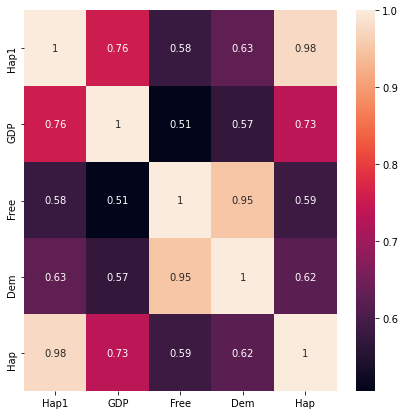

In [19]:
#View correlations as a heatmap matrix, lighter colours = more correlation
plt.figure(figsize = (7,7))
sns.heatmap(corr, annot=True)

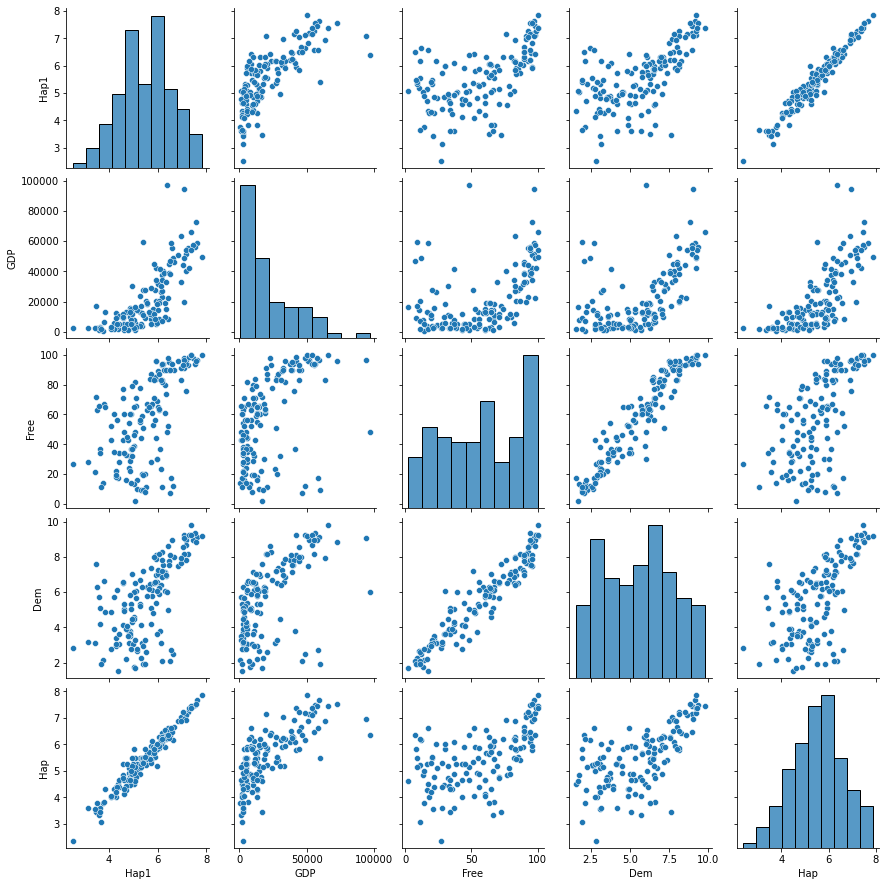

In [20]:
#Scatterplot for the data
sns.pairplot(dataset)
#If classification, can use sns.pairplot(dataset, hue = '(insert name of Y variable)') to colour dots based on class)

In [21]:
#Preparing the data for the decision tree model
#Excluding Hap1 as it is a near duplicate of Hap
#Separate the dataset into dependent (x) and independent (y, happiness score) components, starting with converting to array
array = dataset.values

X = array[:, 1:4]
Y = array[:, 4]


In [22]:
#Split into training and test data
# We train the model on the training data and then test how good it is using the unseen test data
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)

In [23]:
print(X.shape)

(140, 3)


In [24]:
print(Y.shape)

(140,)


In [25]:
#Fit model #1 Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt3 = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 5)
dt3.fit(X, Y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

In [26]:
#Test decision Tree model accuracy using test dataset
#resultdt = dt.score(X_test, Y_test)
#print("Test Set Accuracy of Decision Tree model: %.3f%%" % (resultdt*100.0))

In [27]:
#Plot confusion matrix to see what proportion of diabetes cases are predicted correctly
#from sklearn.metrics import plot_confusion_matrix
#matrixdt = plot_confusion_matrix(dt, X_test, Y_test, cmap=plt.cm.Blues)
#plt.show(matrixdt)

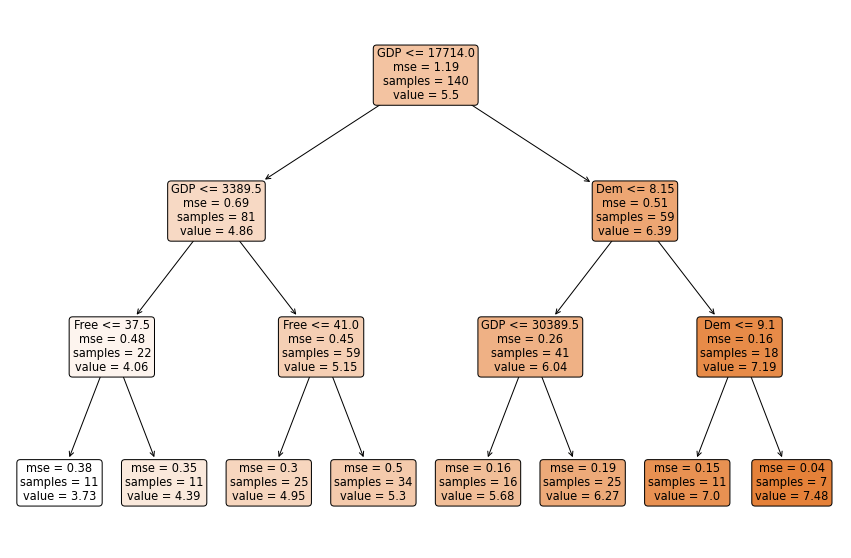

In [28]:
#Plot Decision Tree model as a tree using sklearn.tree, plot_tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(15,10))
fn = ['GDP', 'Free', 'Dem']
plot_tree(dt3, filled=True, ax=ax, feature_names = fn, rounded=True, precision = 2)
plt.show()

In [29]:
dt3.feature_importances_

array([0.82555066, 0.03312682, 0.14132252])

In [30]:
#Fit model #1 Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt4 = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 5)
dt4.fit(X, Y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5)

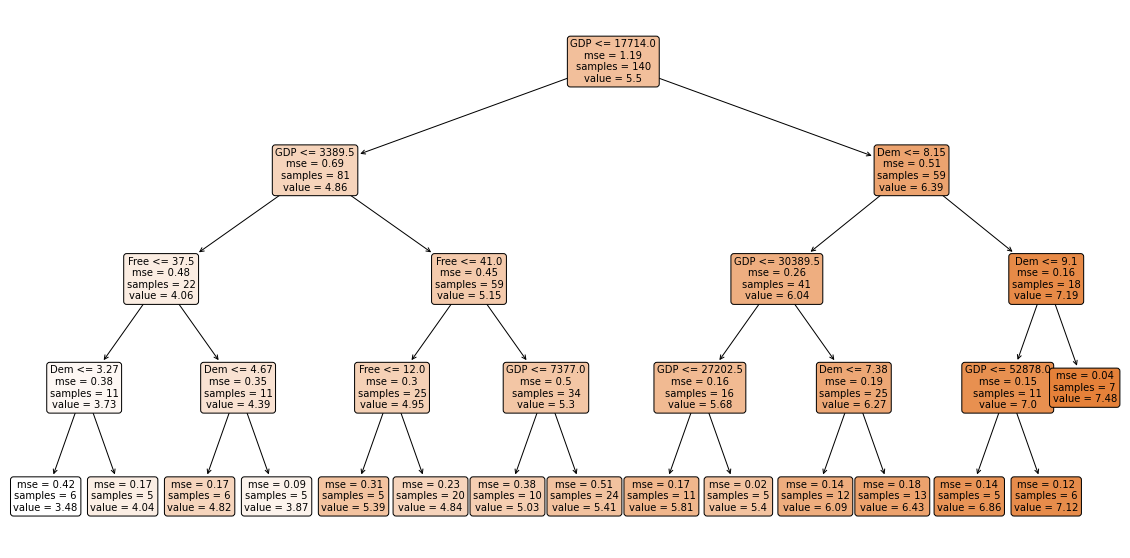

In [31]:
#Plot Decision Tree model as a tree using sklearn.tree, plot_tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(20,10))
fn = ['GDP', 'Free', 'Dem']
plot_tree(dt4, filled=True, ax=ax, feature_names = fn, rounded=True, precision = 2, fontsize = 10)
plt.show()

In [32]:
dt4.feature_importances_

array([0.79513168, 0.04050831, 0.16436001])